<b>SEISMICITY IN THE CENTRAL CALIFORNIA REGION</b>

To find the events in the region, import the libraries and set the parameters.

In [1]:
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from obspy.clients.fdsn import Client
client = Client("IRIS")

In [2]:
startt = UTCDateTime("2000-01-01")
endt = UTCDateTime("2020-01-01")
lat = 35.7
lon = -121.1
minmag = 2.0
maxrad= 1.0

Retrieve the catalog and print events

In [3]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="ISC")

In [4]:
print (cat)

1031 Event(s) in Catalog:
2015-08-19T11:39:38.040000Z | +36.555, -121.073 | 2.8 ML
2015-08-18T10:59:21.260000Z | +35.864, -120.000 | 3.0 ML
...
2000-02-01T20:59:28.750000Z | +35.063, -120.849 | 2.9 ML
2000-01-17T18:47:51.060000Z | +36.274, -120.455 | 2.9 MD
To see all events call 'print(CatalogObject.__str__(print_all=True))'


The next code will create two list objects called <B>times</B> and <B>mags</B>. They will be taken from the catalog object and stored in separate lists using the times.append syntax

The outputs will show examples of the date and then the same date converted to a number to be used by Matplotlib

In [5]:
times = [] 
mags = [] 
for event in cat: 
    times.append(event.origins[0].time.datetime) 
    mags.append(event.magnitudes[0].mag)
print(times[4], mags[4])
mtimes = mdates.date2num(times)
print(mtimes[4], mags[4]) #shows conversion from date to number

2015-08-02 16:30:41.670000 3.0
735812.687982 3.0


Plot of seismicity of the region, using the parameters set above.

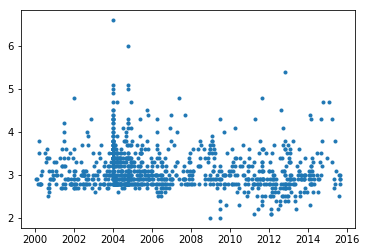

In [6]:
fig1 = plt.subplots(1,1)
plt.plot_date(mtimes,mags,marker='.') 
plt.show()

The seismicity of this region is underpinned by events in the magnitude ranges of M3-4.  Since 2009, there has been an increase in lower magnitude events.  

Most powerful event was magnitude 6.5, occurred on 22nd December 2003. In 2003, there was also a marked increase in seismicity. These events are likely related to the large event as foreshocks/ aftershocks. 

Let's take a closer look at the M6.5 event. 

Examine the IU.TUC.00.BHZ recordings for these events, which are available from the IRIS data center.  

In [15]:
client = Client("IRIS")
network = "IU"
station = "TUC"
location = "00"
channel = "BHZ"
startt = UTCDateTime("2003-12-22T19:17:56")
endt = UTCDateTime("2003-12-22T19:27:56")
st = client.get_waveforms(network, station, location, channel, startt, endt)

Extract a seismic trace and then plot it

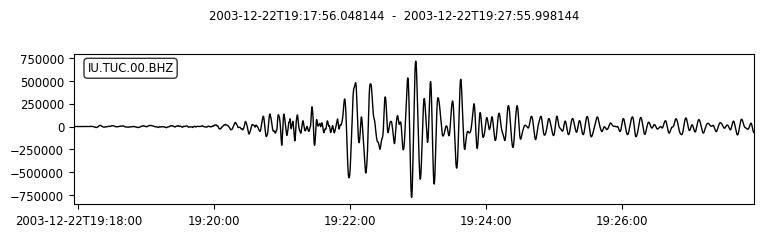

In [16]:
tr = st[0]
fig = tr.plot()

Change to figsize parameter for matplotlib

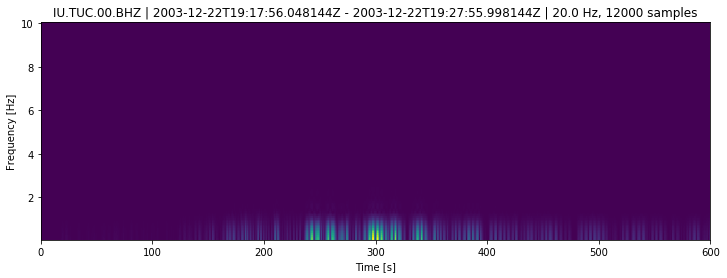

In [17]:
plt.rcParams['figure.figsize'] = (12, 4)
fig = tr.spectrogram(per_lap=.5, wlen=2)

Energy only present at very bottom of spectogram. Let's have a look at the lower frequencies

We will adapt the previous code to set the y-axis to be between 0 and 2 Hz

(0, 2)

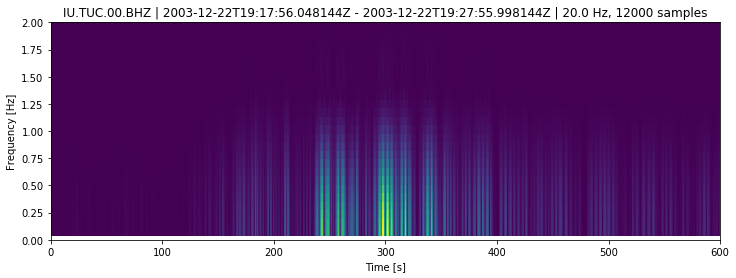

In [23]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=2)
ax = fig.axes[0] 
ax.set_ylim(0, 2) 

The energy starts abruptly in time. An abrupt burst (<10 s) of energy can be seen on frequencies less than 1 Hz. The energy stops gradually over time.

The low frequencies point towards a high magnitude event, which is exactly what the records show. This spectogram is consistent with the fact that this was the most damaging earthquake to hit the United States since the Northridge quake of 1994. 